In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [9]:
def create_model():
    model = Sequential([
        Conv2D(16, (4, 4), strides=1, activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'),

        Conv2D(32, (4, 4), strides=1, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'),

        Conv2D(16, (4, 4), strides=1, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'),

        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # binary classification
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [11]:
model = create_model()


model.load_weights('model/ai_imageclassifier.h5')

d:\vscode\FYP_final\FYP\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',  # Folder structure: test/real/, test/fake/
    image_size=(32, 32),
    batch_size=32,
    label_mode='int',  # 'int' if using binary classification
    shuffle=False
)


Found 20000 files belonging to 2 classes.


In [16]:
#scaling test data
test_data = test_data.map(lambda x, y : (x/255, y))
scaled_it = test_data.as_numpy_iterator()
test_batch = scaled_it.next()
print(test_batch[0].min())
print(test_batch[0].max())
print(len(test_data))

0.0
1.0
625


In [18]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [19]:
for test_batch in test_data.as_numpy_iterator(): 
    X, y = test_batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/

In [20]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9138970971107483, Recall: 0.8937000036239624, Accuracy: 0.9047499895095825


In [21]:
loss, accuracy = model.evaluate(test_data, verbose=0)

In [22]:
print(loss, accuracy
)

0.2513548731803894 0.9047499895095825


C:\Users\UBADA DAWOOD\AppData\Local\Temp\ipykernel_13180\4054392751.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


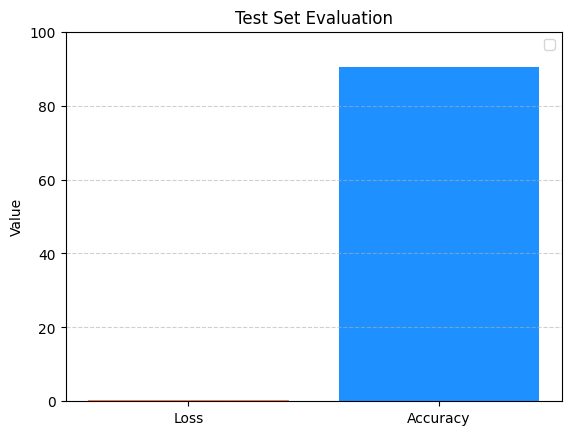

In [29]:
plt.bar(['Loss', 'Accuracy'], [loss, accuracy * 100], color=['coral', 'dodgerblue'])
plt.title('Test Set Evaluation')
plt.ylabel('Value')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()